In [214]:
import numpy as numpy
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


In [215]:
df=pd.read_csv("C:/Users/Hp/OneDrive/Desktop/Placement/Projects/Spamclassifier/spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [216]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5302,ham,About &lt;#&gt; bucks. The banks fees are fix...,NaN,NaN,NaN
5128,ham,Wot about on wed nite I am 3 then but only til 9!,NaN,NaN,NaN
3061,ham,Fine. Do you remember me.,NaN,NaN,NaN
3745,ham,I'm not. She lip synced with shangela.,NaN,NaN,NaN
4301,ham,Aiyar hard 2 type. U later free then tell me t...,NaN,NaN,NaN


In [217]:
df.shape

(5572, 5)

In [218]:
# 1) data cleaning
#2) EDA
# 3) text preprocesing
# 4) modle building
# 5) evaluation
# 6) improvements
# 7) website
# 8) depl0y

DATA CLEANING

In [219]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [220]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [221]:
df.sample(5)

,v1,v2
105,ham,Thanks a lot for your wishes on my birthday. T...
4484,ham,What not under standing.
1542,ham,Now press conference da:)
3420,spam,Welcome! Please reply with your AGE and GENDER...
5140,ham,Yeah I imagine he would be really gentle. Unli...


In [222]:
# renamming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [223]:
df.sample(5)

,target,text
459,ham,Going thru a very different feeling.wavering d...
1666,ham,Guess who spent all last night phasing in and ...
3193,ham,And you! Will expect you whenever you text! Ho...
2042,ham,"Me not waking up until 4 in the afternoon, sup"
2066,ham,Then. You are eldest know.


In [224]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [225]:
df['target']=encoder.fit_transform(df['target'])

In [226]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [227]:
## check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [228]:
# check for duplicate values
df.duplicated().sum()

403

In [229]:
df=df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [230]:
df.shape

(5169, 2)

In [231]:
######################exploratory data analysisa##############################

In [232]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a81bacbc20>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

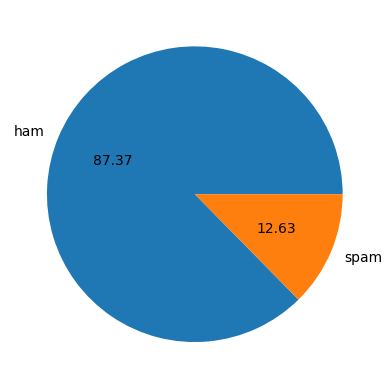

In [233]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [234]:
##data is imbalanced


In [235]:
# %pip install nltk
%pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [236]:
import nltk

In [237]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [238]:
df.columns

Index(['target', 'text'], dtype='object')

In [239]:
df['num_characters'] = df['text'].apply(lambda x: len(x))


C:\Users\Hp\AppData\Local\Temp\ipykernel_55436\1048410894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(lambda x: len(x))


In [240]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [241]:
df['num_characters'] = df['text'].apply(lambda x: len(x))
df


C:\Users\Hp\AppData\Local\Temp\ipykernel_55436\577036309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(lambda x: len(x))


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [242]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure 'punkt' is downloaded
nltk.download('punkt')

# Apply word tokenization
df["num_words"] = df["text"].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Hp\AppData\Local\Temp\ipykernel_55436\2348954995.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["text"].apply(lambda x: len(word_tokenize(x)))


In [243]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [244]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [245]:
# num of sentences 

df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\Hp\AppData\Local\Temp\ipykernel_55436\332728149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [246]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [247]:
df.columns


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [248]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [249]:
######these are ham (non spam messages)
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [250]:
######these are  ( spam messages)
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

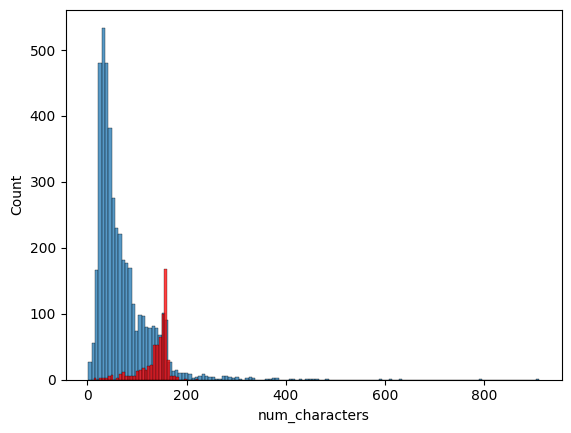

In [251]:
########spam messeges avg is larger than ham messeges
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


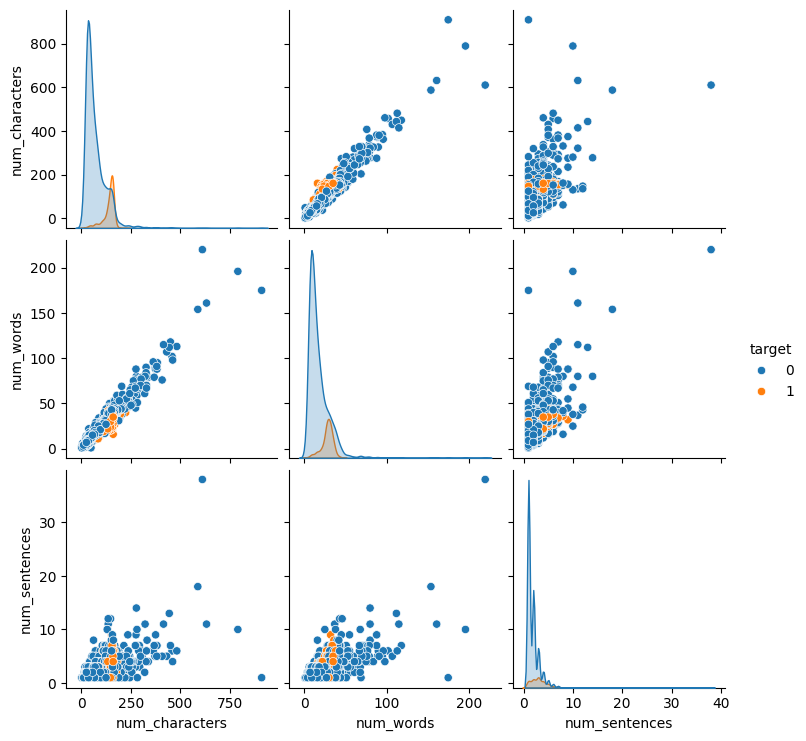

In [252]:
sns.pairplot(df,hue='target')

<Axes: >

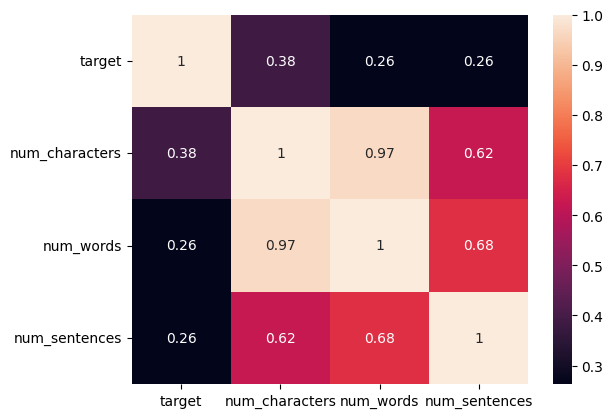

In [253]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

DATA PREPROCESSING
    lowercase
    tokenization
    removing special chaarachters
    removing step words and punctuation
    stemming

In [254]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [255]:
import string


In [256]:


# stopwords.words('english')

In [257]:
def transform_text(text):
    text = text.lower()   # lowercasing 
    text = nltk.word_tokenize(text) # tokenization 
    
    y = []
    for i in text:
        if i.isalnum():   # if the character is alphanumeric character (a-z , 1-9)
            y.append(i)
    
    text = y[:]  
    y.clear() 
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [258]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [259]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [260]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\Hp\AppData\Local\Temp\ipykernel_55436\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [261]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [262]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [263]:

from wordcloud import WordCloud

In [264]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc

In [265]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


# jo spam he vo hi he 

# words jinti zyada bar repeat hua he us text ka font utna hi bada he 


# free , text , call , ye bahut bar repeat hua he spam messages me 


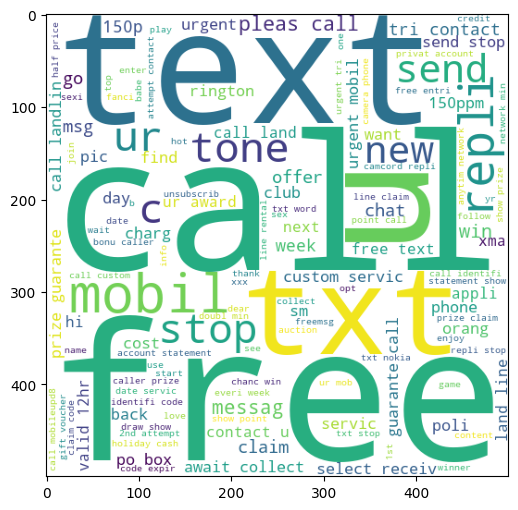

In [266]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [267]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))



# jo ham he vo hi he 

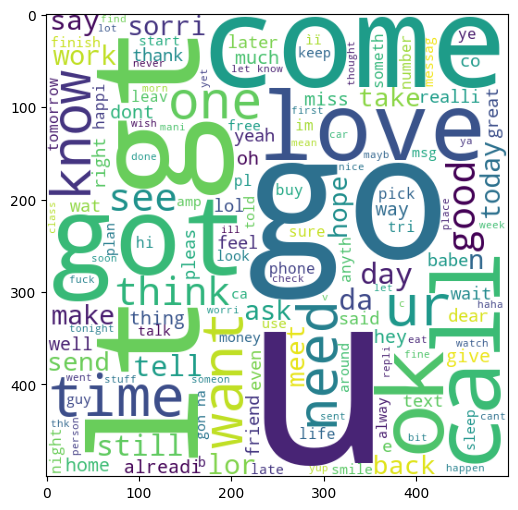

In [268]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [269]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [270]:
len(spam_corpus) # what this spam corpus > 

# This code snippet creates a spam_corpus, which is a list of all words 
# that appear in spam messages from your dataset.

                # it is a list of all words from spam message 


                # It helps in analyzing the most common words used in spam messages.
 

 # You can use it for word frequency analysis, word clouds, or visualization.


9939

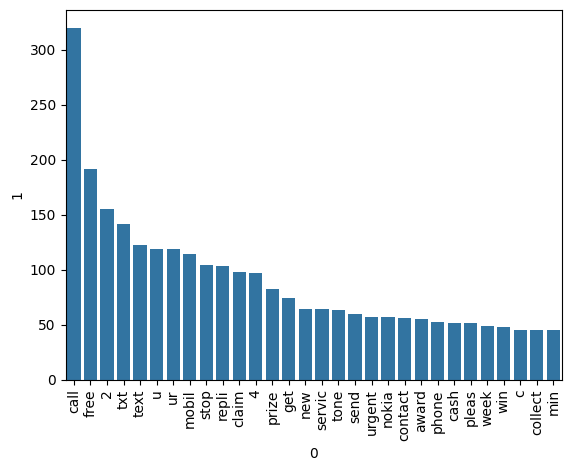

In [271]:
from collections import Counter 

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [272]:
# 300 +  times call words are used in spam message , and then free which is used 200 + times 

In [273]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [274]:
len(ham_corpus) # kitne words he ham me , means non spam me 

# 35404 words he ham messages me to ham_campus ek list he jaha ye ham words he 

35404

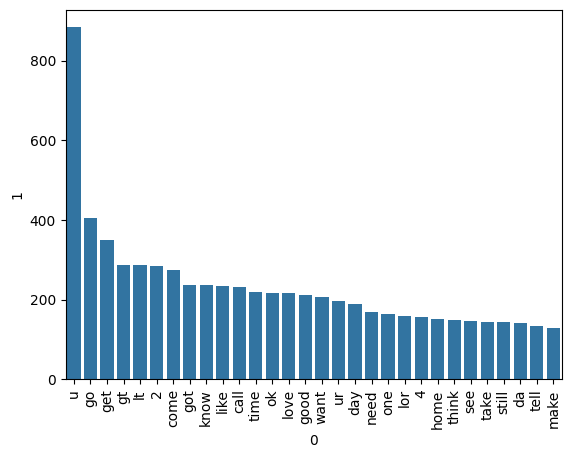

In [275]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [276]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [277]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [278]:
#####text vectorization
######using bag of words

MODEl BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000) # isme hume top ke 3000 words hi milenge 

In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X


# 5169 rows he and 3000 total wordsd , he basically humne top 3000 imp words liye he , jo most repeat kar raha he

# 
# we are convertinng  5169 , each of 3000 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [281]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [282]:
X.shape

(5169, 3000)

In [ ]:
X[0]  # ye vector he in form of array , 

array([0., 0., 0., ..., 0., 0., 0.])

In [300]:
X[0].shape

(3000,)

In [297]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [298]:
y.shape


(5169,)

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [287]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [288]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# # gnb.fit(X_train,y_train)
# train_Accuracy = gnb.score(X_train,y_train)
# # print(f"Train Accuracy is :",train_Accuracy*100)

Train Accuracy is : 89.31076178960097


In [ ]:
y_train_pred = gnb.predict(X_train)
train_Accuracy = accuracy_score(y_train,y_train_pred)


In [315]:
y_pred1 = gnb.predict(X_test)
print(f"Train Accuracy is :",train_Accuracy)
print(f"Test Accuracy",accuracy_score(y_test,y_pred1))
print(f"Confusion Matrix",confusion_matrix(y_test,y_pred1))
print(f"Precision score",precision_score(y_test,y_pred1))
#very bad output obtained

Train Accuracy is : 0.8931076178960097
Test Accuracy 0.8694390715667312
Confusion Matrix [[788 108]
 [ 27 111]]
Precision score 0.5068493150684932


In [316]:
mnb.fit(X_train,y_train)

y_train_pred = mnb.predict(X_train)
train_Accuracy = accuracy_score(y_train,y_train_pred)

In [320]:
y_pred2 = mnb.predict(X_test)
print(f"Train Accuracy",train_Accuracy)
print(f"Test Accuracy",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(f"precision score",precision_score(y_test,y_pred2))
# still better

Train Accuracy 0.9789600967351875
Test Accuracy 0.9709864603481625
[[896   0]
 [ 30 108]]
precision score 1.0


In [322]:
bnb.fit(X_train,y_train)

y_train_pred=bnb.predict(X_train)

train_Accuracy = accuracy_score(y_train,y_train_pred)


In [324]:
y_pred3 = bnb.predict(X_test)
print(f"Train Accuracy",train_Accuracy)
print(f"Test Accuracy",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(f"precision score",precision_score(y_test,y_pred3))
# good


Train Accuracy 0.9857315598548972
Test Accuracy 0.9835589941972921
[[895   1]
 [ 16 122]]
precision score 0.991869918699187


In [292]:
# due to imbalance data we prefer accuracy 
# tfidf,mnb used


In [293]:
import pickle

In [325]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))